In [ ]:
!pip install -U transformers accelerate datasets bertviz umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.2/333.2 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: accelerate
  

In [ ]:
!pip install seaborn --upgrade

ERROR: Operation cancelled by user


In [4]:
import pandas as pd

data = pd.read_csv("cleaned_twitter_sentiment_data.csv")
# data = pd.read_csv("cleaned_twitter_sentiment_data.csv")

In [94]:
data.head()

,label,text,label_name
0,2,ahem ahem coughing smog sorry anyways global w...,Pro
1,3,world fight climate change era trump obamas sc...,News
2,3,ddt ban global warming blame u mosquito erupti...,News
3,2,degrees day christmas bad hombre trump thinks ...,Pro
4,3,lloyds london divest coal climate change,News


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91848 entries, 0 to 91847
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       91848 non-null  int64 
 1   text        91689 non-null  object
 2   label_name  91848 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.1+ MB


In [2]:
data['label'].value_counts()

label
2    22962
3    22962
0    22962
1    22962
Name: count, dtype: int64

In [6]:
data.isnull().sum()

label           0
text          159
label_name      0
dtype: int64

In [5]:
# Remove rows with any null values
data.dropna(inplace=True)

In [6]:
data['label'].value_counts()

label
3    22959
2    22945
0    22899
1    22886
Name: count, dtype: int64

In [7]:
data.isnull().sum()

label         0
text          0
label_name    0
dtype: int64

# Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Frequency of Classes')

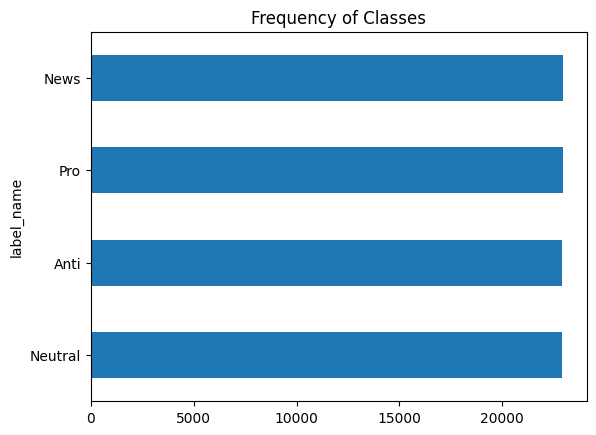

In [101]:
label_counts = data['label_name'].value_counts(ascending = True)
label_counts.plot.barh()
plt.title("Frequency of Classes")

In [8]:
data['Words per tweet'] = data['text'].str.split().apply(len)
data['Words per tweet']

0         9
1        11
2         9
3        11
4         6
         ..
91843     4
91844     8
91845     8
91846     5
91847    10
Name: Words per tweet, Length: 91689, dtype: int64

<Axes: title={'center': 'Words per tweet'}, xlabel='label_name'>

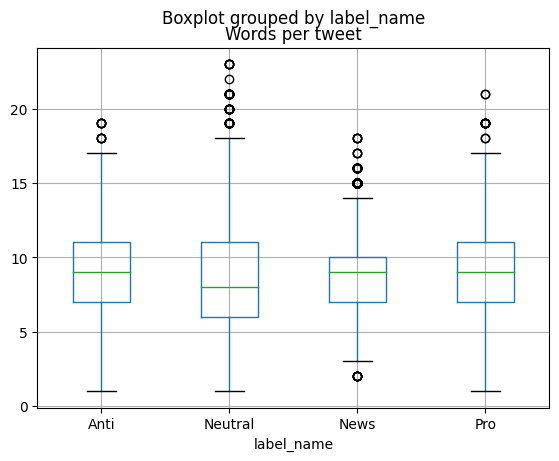

In [8]:
data.boxplot('Words per tweet', by = 'label_name')

# Tokenization

In [9]:
from transformers import AutoTokenizer

# Choose the specific model
model_ckpt = 'bert-base-uncased'
# model_ckpt = 'distilbert-base-uncased'
# model_ckpt = 'roberta-base'

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

C:\Users\nawaf\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [10]:
# Checking the tokenizer
text = "I love programming! It's my passion."
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1045, 2293, 4730, 999, 2009, 1005, 1055, 2026, 6896, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [11]:
tokenizer.vocab_size ,len(tokenizer.vocab),tokenizer.model_max_length

(30522, 30522, 512)

# DataLoader and Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size = 0.3, stratify = data['label_name'])

In [10]:
# validation split
test, validation = train_test_split(test, test_size = 1/3, stratify = test['label_name'])

In [11]:
train.shape, test.shape, validation.shape

((64182, 4), (18338, 4), (9169, 4))

In [12]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    'train' : Dataset.from_pandas(train,preserve_index = False),
    'test' : Dataset.from_pandas(test,preserve_index = False),
    'validation' : Dataset.from_pandas(validation,preserve_index = False)
})

dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'label_name', 'Words per tweet'],
        num_rows: 64182
    })
    test: Dataset({
        features: ['label', 'text', 'label_name', 'Words per tweet'],
        num_rows: 18338
    })
    validation: Dataset({
        features: ['label', 'text', 'label_name', 'Words per tweet'],
        num_rows: 9169
    })
})

# Tokenization of Data

In [17]:
def tokenize(batch):
    temp = tokenizer(batch['text'],padding = True, truncation = True)
    return temp

print(tokenize(dataset['train'][0]))

{'input_ids': [101, 4633, 7155, 2424, 4748, 21929, 7526, 7499, 3795, 12959, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [18]:
emotion_encoded = dataset.map(tokenize, batched = True, batch_size = None)

Map:   0%|          | 0/64182 [00:00<?, ? examples/s]

Map:   0%|          | 0/18338 [00:00<?, ? examples/s]

Map:   0%|          | 0/9169 [00:00<?, ? examples/s]

In [19]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'label_name', 'Words per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 64182
    })
    test: Dataset({
        features: ['label', 'text', 'label_name', 'Words per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 18338
    })
    validation: Dataset({
        features: ['label', 'text', 'label_name', 'Words per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9169
    })
})

In [13]:
#label2id and id2label

label2id = {x['label_name'] : x['label'] for x in dataset['train']}
id2label = {v : k for k,v in label2id.items()}

In [14]:
label2id

{'Pro': 2, 'News': 3, 'Anti': 0, 'Neutral': 1}

In [15]:
id2label

{2: 'Pro', 3: 'News', 0: 'Anti', 1: 'Neutral'}

# Model Building

In [23]:
from transformers import AutoModel
import torch

In [24]:
model = AutoModel.from_pretrained(model_ckpt)

C:\Users\nawaf\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\nawaf\anaconda3\Lib\site-packages\transformers\utils\generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\nawaf\anaconda3\Lib\site-packages\transformers\utils\generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\nawaf\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. I

pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

In [25]:
model

ElectraModel(
  (embeddings): ElectraEmbeddings(
    (word_embeddings): Embedding(30522, 128, padding_idx=0)
    (position_embeddings): Embedding(512, 128)
    (token_type_embeddings): Embedding(2, 128)
    (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
  (encoder): ElectraEncoder(
    (layer): ModuleList(
      (0-11): 12 x ElectraLayer(
        (attention): ElectraAttention(
          (self): ElectraSelfAttention(
            (query): Linear(in_features=256, out_features=256, bias=True)
            (key): Linear(in_features=256, out_features=256, bias=True)
            (value): Linear(in_features=256, out_features=256, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): ElectraSelfOutput(
            (dense): Linear(in_features=256, out_features=256, bias=True)
            (LayerNorm): LayerNorm((

# Loading Model for Sequence Classification

In [27]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_labels = len(label2id)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
config = AutoConfig.from_pretrained(model_ckpt,label2id = label2id,id2label = id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,config = config).to(device)

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
model

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Li

In [29]:
model.config

ElectraConfig {
  "_name_or_path": "google/electra-small-discriminator",
  "architectures": [
    "ElectraForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 256,
  "id2label": {
    "0": "Anti",
    "1": "Neutral",
    "2": "Pro",
    "3": "News"
  },
  "initializer_range": 0.02,
  "intermediate_size": 1024,
  "label2id": {
    "Anti": 0,
    "Neutral": 1,
    "News": 3,
    "Pro": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 4,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "summary_activation": "gelu",
  "summary_last_dropout": 0.1,
  "summary_type": "first",
  "summary_use_proj": true,
  "transformers_version": "4.33.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

# Building Training Arguements

$1.$ `eval_steps`:

`eval_steps` determines how frequently the model is evaluated during training, which can impact both training time and your ability to monitor for overfitting. A good rule of thumb is to set `eval_steps` so that evaluation occurs 5–10 times per epoch. This way, you get regular feedback on the model's performance without slowing down training excessively.

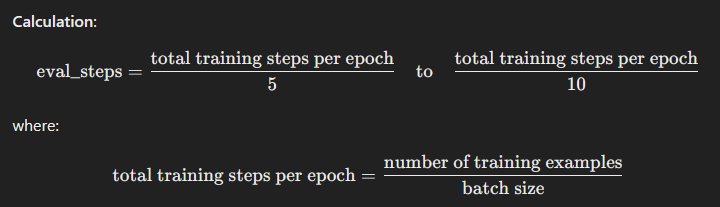

$2.$ `warmup_steps`:

`warmup_steps` helps the model gradually adjust during the initial phase of training, which can prevent large, destabilizing updates at the beginning. It’s often set as a small percentage of the total training steps, generally between 5% and 10%.

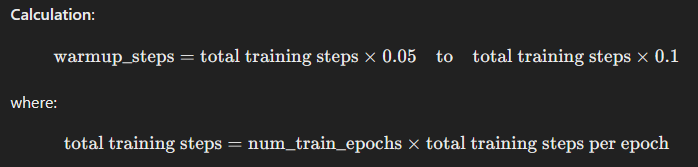

`Training Samples` = $30,742$

`No. of Epochs` = $2$  `Batch Size` = $8$

`Total Training steps per Epoch` = $\frac{30,742}{8} = 3,842$

`eval_steps` = $385$ to $770$

`warmup_steps` = $385$ to $770$

In [30]:
dataset['train']

Dataset({
    features: ['label', 'text', 'label_name', 'Words per tweet'],
    num_rows: 64182
})

In [31]:
from transformers import TrainingArguments

batch_size = 8 # Smaller batch size due to memory constraints
training_dir = "bert_base_train_dir"
# training_dir = "roberta_base_train_dir"
# training_dir = "distilbert_base_train_dir"

training_args = TrainingArguments(
    output_dir = training_dir,
    overwrite_output_dir = True,
    num_train_epochs = 2,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    weight_decay = 0.01,
#     evaluation_strategy = 'epoch',
    evaluation_strategy = 'steps',  # Evaluate more frequently
    eval_steps = 805,  # Calculated based on dataset size as shown above
    gradient_accumulation_steps = 2,  # Simulates a larger batch size
    warmup_steps = 805,  # Warm-up to stabilize early training
    disable_tqdm = False
)

# Building the compute metrics

In [ ]:
!pip install evaluate

In [32]:
# use the evaluate library
import evaluate
import numpy as np

# accuracy = evaluate.load('accuracy')

def compute_metrics_evaluate(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions,axis = 1)
    return accuracy.compute(predictions = predictions,references = labels)

In [33]:
# use sklearn to build compute metrics

from sklearn.metrics import accuracy_score,f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    f1 = f1_score(labels,preds,average = 'weighted')
    acc = accuracy_score(labels,preds)

    return {'accuracy' : acc,'f1' : f1}

# Build the Trainer and Train the model

In [34]:
from transformers import Trainer

trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset = emotion_encoded['train'],
    eval_dataset = emotion_encoded['validation'],
    tokenizer = tokenizer
#     loss_func = lambda output, target: torch.nn.CrossEntropyLoss(weight=class_weights)(output, target)
)

In [151]:
tokenizer

RobertaTokenizerFast(name_or_path='FacebookAI/roberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}, clean_up_tokenization_spaces=True)

In [35]:
import wandb
wandb.init(mode="disabled")

In [36]:
trainer.train()

You're using a ElectraTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss,Accuracy,F1
805,1.361200,1.177799,0.464936,0.425974


KeyboardInterrupt: 

# Evaluating on the Test set

In [58]:
trainer

In [153]:
preds_output = trainer.predict(emotion_encoded['test'])
preds_output.metrics

{'test_loss': 0.3780396282672882,
 'test_accuracy': 0.8671610862689497,
 'test_f1': 0.8656033305862715,
 'test_runtime': 645.145,
 'test_samples_per_second': 28.425,
 'test_steps_per_second': 3.554}

In [127]:
preds_output.predictions

array([[ 5.304207  , -1.5502491 , -1.5085207 , -1.8534577 ],
       [-0.5309776 ,  1.7067919 ,  2.5119805 , -3.8035824 ],
       [-2.165796  ,  5.1607122 , -0.2787121 , -3.1981356 ],
       ...,
       [-0.8564172 , -2.4456239 , -1.6858182 ,  4.616353  ],
       [-2.3735023 ,  4.0709033 ,  0.13569884, -2.450375  ],
       [-1.0419359 ,  2.6392965 ,  1.4961133 , -3.4605265 ]],
      dtype=float32)

In [154]:
y_pred = np.argmax(preds_output.predictions,axis = 1)
y_true = emotion_encoded['test'][:]['label']

In [155]:
from sklearn.metrics import classification_report

# Define your class names based on your labels
class_names = ['News', 'Anti', 'Pro', 'Neutral']

# Print a classification report
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        News       0.91      0.95      0.93      4580
        Anti       0.85      0.82      0.83      4577
         Pro       0.83      0.77      0.80      4589
     Neutral       0.87      0.93      0.90      4592

    accuracy                           0.87     18338
   macro avg       0.87      0.87      0.87     18338
weighted avg       0.87      0.87      0.87     18338



# Confusion Matrix

[[4371  110   65   34]
 [ 226 3734  436  181]
 [ 196  458 3517  418]
 [  24   70  218 4280]]


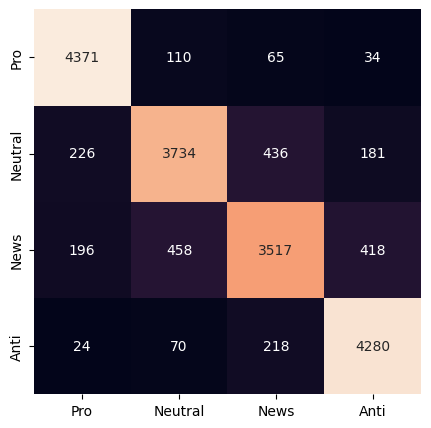

In [161]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true,y_pred)
print(cm)

plt.figure(figsize = (5,5))
sns.heatmap(cm,annot=True,xticklabels=label2id.keys(),yticklabels=label2id.keys(),fmt = 'd',cbar = False)
plt.show()

In [162]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are your true labels and predicted labels
conf_matrix = confusion_matrix(y_true, y_pred)

# Per-class accuracy
per_class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
print("Per-class accuracy:", per_class_accuracy)

Per-class accuracy: [0.95436681 0.81581822 0.76639791 0.93205575]


In [163]:
distil_bert_accuracy_dict = [0.95196507, 0.84727988, 0.77969056, 0.93336237]
bert_accuracy_dict = [0.969869, 0.87743063, 0.80910874, 0.93989547]
roberta_accuracy_dict = [0.95436681, 0.81581822, 0.76639791, 0.93205575]
np.array(roberta_accuracy_dict).sum()/4

0.8671596724999999

In [67]:
text = "I am super happy today. I got it done. Finally!"

def get_prediction(text):
    input_encoded = tokenizer(text,return_tensors = 'pt').to(device)
    input_encoded

    with torch.no_grad():
        outputs = model(**input_encoded)

    logits = outputs.logits
    pred = torch.argmax(logits,dim=1).item()
    return pred, id2label[pred]

In [149]:
logits

NameError: name 'logits' is not defined

# Saving the model

In [165]:
trainer.save_model('roberta_base_model')

## Ensemble Learning Model

In [37]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Saved Fine-Tuned BERT model
bert_model = AutoModelForSequenceClassification.from_pretrained("bert_base_model")
bert_tokenizer = AutoTokenizer.from_pretrained("bert_base_model")

# Saved Fine-Tuned DistilBERT model
distilbert_model = AutoModelForSequenceClassification.from_pretrained("distilbert_base_model")
distilbert_tokenizer = AutoTokenizer.from_pretrained("distilbert_base_model")

# Saved Fine-Tuned RoBERTa model
roberta_model = AutoModelForSequenceClassification.from_pretrained("roberta_base_model")
roberta_tokenizer = AutoTokenizer.from_pretrained("roberta_base_model")

C:\Users\nawaf\anaconda3\Lib\site-packages\transformers\utils\generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [38]:
def preprocess_text(text, tokenizer, max_length=128):
    return tokenizer(text, truncation=True, padding=True, max_length=max_length, return_tensors="pt")

# Example text input
text = "This is a sample input for sentiment analysis."

# Preprocess for each model
bert_input = preprocess_text(text, bert_tokenizer)
distilbert_input = preprocess_text(text, distilbert_tokenizer)
roberta_input = preprocess_text(text, roberta_tokenizer)

In [41]:
import torch.nn.functional as F

# Get logits for each model
bert_logits = bert_model(**bert_input).logits
distilbert_logits = distilbert_model(**distilbert_input).logits
roberta_logits = roberta_model(**roberta_input).logits

# Convert logits to probabilities
bert_probs = F.softmax(bert_logits, dim=-1)
distilbert_probs = F.softmax(distilbert_logits, dim=-1)
roberta_probs = F.softmax(roberta_logits, dim=-1)

In [42]:
ensemble_probs = (bert_probs + distilbert_probs + roberta_probs) / 3
predicted_class = torch.argmax(ensemble_probs, dim=-1).item()

# Weighted Averaging
# weights = [0.35, 0.35, 0.3]  # Example weights for BERT and RoBERTa
# ensemble_probs = (weights[0]*bert_probs + weights[1]*distilbert_probs + weights[2]*roberta_probs)
# predicted_class = torch.argmax(ensemble_probs, dim=-1).item()

In [44]:
bert_pred = torch.argmax(bert_probs, dim=-1).item()
distilbert_pred = torch.argmax(distilbert_probs, dim=-1).item()
roberta_pred = torch.argmax(roberta_probs, dim=-1).item()

# Majority voting
votes = [bert_pred, distilbert_pred, roberta_pred]
predicted_class = max(set(votes), key=votes.count)

In [ ]:
def evaluate_ensemble(models, tokenizers, dataset, weights=None):
    correct = 0
    total = 0
    
    for text, label in dataset:
        # Tokenize and predict for each model
        all_probs = []
        for model, tokenizer in zip(models, tokenizers):
            input_data = preprocess_text(text, tokenizer)
            logits = model(**input_data).logits
            probs = F.softmax(logits, dim=-1)
            all_probs.append(probs)
        
        # Combine predictions (weighted averaging as an example)
        if weights:
            ensemble_probs = sum(w * p for w, p in zip(weights, all_probs))
        else:
            ensemble_probs = sum(all_probs) / len(all_probs)
        
        predicted_class = torch.argmax(ensemble_probs, dim=-1).item()
        if predicted_class == label:
            correct += 1
        total += 1
    
    return (correct / total)

# Example usage
models = [bert_model, distilbert_model, roberta_model]
tokenizers = [bert_tokenizer, distilbert_tokenizer, roberta_tokenizer]
# weights = [0.35, 0.35, 0.3]
# accuracy = evaluate_ensemble(models, tokenizers, test_dataset, weights=weights)
accuracy = evaluate_ensemble(models, tokenizers, test_dataset)
print(f"Ensemble Accuracy: {accuracy:.2f}")

In [51]:
distilbert_model.config.model_type

'distilbert'

In [82]:
import pandas as pd
import torch
import torch.nn.functional as F

# Example: models and tokenizers
models = [bert_model, distilbert_model, roberta_model]  # List of trained models
tokenizers = [bert_tokenizer, distilbert_tokenizer, roberta_tokenizer]  # Corresponding tokenizers
# weights = [1, 1, 1]  # Example weights for averaging
weights = [0.35, 0.35, 0.3]  # Example weights for averaging


# Dataset splits
test_dataset = emotion_encoded['test']  # Replace with your actual DatasetDict object

# Store results
results = []

# Iterate over the test dataset
for example in test_dataset:
    input_ids = torch.tensor(example['input_ids']).unsqueeze(0)  # Add batch dimension
    attention_mask = torch.tensor(example['attention_mask']).unsqueeze(0)
    token_type_ids = torch.tensor(example['token_type_ids']).unsqueeze(0)
    
    all_probs = []
    for model in models:
        # Check if the model supports `token_type_ids`
        model_name = model.config.model_type
        inputs = {"input_ids": input_ids, "attention_mask": attention_mask}
        if model_name not in ["distilbert", "xlm-roberta"]:
            inputs["token_type_ids"] = token_type_ids
        
        # Get logits and probabilities
        with torch.no_grad():
            logits = model(**inputs).logits
        probs = F.softmax(logits, dim=-1)
        all_probs.append(probs)
        
#         # Get logits and probabilities
#         with torch.no_grad():
#             logits = model(input_ids=input_ids, 
#                            attention_mask=attention_mask, 
#                            token_type_ids=token_type_ids).logits
#         probs = F.softmax(logits, dim=-1)
#         all_probs.append(probs)
    
    # Ensemble: Weighted average of probabilities
    ensemble_probs = sum(w * p for w, p in zip(weights, all_probs))
    predicted_class = torch.argmax(ensemble_probs, dim=-1).item()
    
    # Collect individual model predictions
    model_probs = [probs.tolist()[0] for probs in all_probs]
    
    # Append results
    results.append({
        "text": example["text"],
        "true_label": example["label"],
        "ensemble_probs": ensemble_probs.tolist()[0],  # Convert to list
        "predicted_label": predicted_class,
        **{f"model_{i+1}_probs": model_probs[i] for i in range(len(models))}
    })

# Convert results to DataFrame
weighted_results_df = pd.DataFrame(results)

In [77]:
results_df[results_df['true_label'] != results_df['predicted_label']]['text'][63]

'president confronted disaster natural disaster climate change eh jeb'

In [72]:
results_df[results_df['true_label'] != results_df['predicted_label']]

,text,true_label,ensemble_probs,predicted_label,model_1_probs,model_2_probs,model_3_probs,true_label_name,predicted_label_name
46,graham openly supports climate change science ...,3,"[0.022284455597400665, 2.445669412612915, 0.46...",1,"[0.0043234736658632755, 0.7508605718612671, 0....","[0.009309484623372555, 0.7300947904586792, 0.2...","[0.008651495911180973, 0.964713990688324, 0.02...",News,Neutral
63,president confronted disaster natural disaster...,1,"[0.46683019399642944, 1.2531960010528564, 1.26...",2,"[0.04405690357089043, 0.03992490842938423, 0.9...","[0.001061607850715518, 0.9885762333869934, 0.0...","[0.42171168327331543, 0.22469490766525269, 0.3...",Neutral,Pro
95,americans finally realize cause climate change,2,"[0.013562202453613281, 1.3379147052764893, 0.8...",1,"[0.0029214646201580763, 0.1589307188987732, 0....","[0.008556053973734379, 0.1907198578119278, 0.4...","[0.002084683394059539, 0.9882642030715942, 0.0...",Pro,Neutral
135,military base hidden ice thought found exposed...,2,"[0.01762145198881626, 0.9760897159576416, 0.92...",3,"[0.010975943878293037, 0.049452219158411026, 0...","[0.0037672820035368204, 0.010846543125808239, ...","[0.0028782268054783344, 0.9157909750938416, 0....",Pro,News
156,seed mob indigenous youth run climate change o...,1,"[0.015515700913965702, 1.2258471250534058, 0.4...",3,"[0.006123235449194908, 0.2630236744880676, 0.0...","[0.0021549109369516373, 0.013410719111561775, ...","[0.007237554527819157, 0.9494127035140991, 0.0...",Neutral,News
...,...,...,...,...,...,...,...,...,...
18280,okay gaining knowledge exists rooting global w...,1,"[0.03367045894265175, 1.4410150051116943, 1.52...",2,"[0.00810664426535368, 0.03787572681903839, 0.9...","[0.010238438844680786, 0.4297271966934204, 0.5...","[0.015325375832617283, 0.9734121561050415, 0.0...",Neutral,Pro
18301,term limits hold importance taxes global warmi...,2,"[1.9094841480255127, 1.037654161453247, 0.0473...",0,"[0.9130176305770874, 0.07248228788375854, 0.01...","[0.9897111058235168, 0.004356755875051022, 0.0...","[0.006755351554602385, 0.9608151316642761, 0.0...",Pro,Anti
18306,surprised donalds epa appointees forgot spanis...,2,"[0.009668665938079357, 2.2171852588653564, 0.7...",1,"[0.0016422567423433065, 0.29609739780426025, 0...","[0.0020071761682629585, 0.9775308966636658, 0....","[0.006019232794642448, 0.9435570240020752, 0.0...",Pro,Neutral
18313,future climate change revealed current climate...,2,"[0.005851931869983673, 2.9452879428863525, 0.0...",1,"[0.0003100004978477955, 0.9911746978759766, 0....","[0.0011874247575178742, 0.9843295216560364, 0....","[0.004354506731033325, 0.9697838425636292, 0.0...",Pro,Neutral


In [70]:
results_df

,text,true_label,ensemble_probs,predicted_label,model_1_probs,model_2_probs,model_3_probs,true_label_name,predicted_label_name
0,indonesias reefs resist change conservationist...,2,"[0.029897265136241913, 0.16293779015541077, 1....",2,"[0.0009173691505566239, 0.0033826702274382114,...","[0.0006325100548565388, 0.004486282356083393, ...","[0.028347386047244072, 0.15506884455680847, 0....",Pro,Pro
1,forget cow farts causing global warming flatul...,0,"[2.9005773067474365, 0.08848738670349121, 0.00...",0,"[0.9959801435470581, 0.0028257512021809816, 0....","[0.9965421557426453, 0.0015345808351412416, 0....","[0.9080550670623779, 0.08412705361843109, 0.00...",Anti,Anti
2,epa chief carbon dioxide primary contributor c...,3,"[0.0038391659036278725, 0.9222756028175354, 0....",3,"[0.0012379076797515154, 0.00040633950266055763...","[0.0015832417411729693, 0.002791617764160037, ...","[0.0010180167155340314, 0.9190776348114014, 0....",News,News
3,climate change liberal fantasy,0,"[2.7846479415893555, 0.18553341925144196, 0.02...",0,"[0.9975990653038025, 0.0012229805579409003, 0....","[0.9968811273574829, 0.0011893869377672672, 0....","[0.7901678085327148, 0.18312105536460876, 0.02...",Anti,Anti
4,wonder scientists accurate push global warming...,0,"[2.947272777557373, 0.02842867746949196, 0.021...",0,"[0.9970839619636536, 0.0012084152549505234, 0....","[0.9920744895935059, 0.0029392230790108442, 0....","[0.9581144452095032, 0.024281037971377373, 0.0...",Anti,Anti
...,...,...,...,...,...,...,...,...,...
18333,counsel says dispute climate change relevant c...,1,"[0.013438102789223194, 2.921785354614258, 0.05...",1,"[0.0012227296829223633, 0.9755004048347473, 0....","[0.001703147660009563, 0.9741904735565186, 0.0...","[0.010512225329875946, 0.9720945358276367, 0.0...",Neutral,Neutral
18334,china rolls eyes trump ridiculous climate chan...,2,"[0.20707201957702637, 0.8863109946250916, 1.62...",2,"[0.024702584370970726, 0.07961449772119522, 0....","[0.052409958094358444, 0.03712601214647293, 0....","[0.12995947897434235, 0.7695704698562622, 0.07...",Pro,Pro
18335,actually small number scientists agree climate...,0,"[1.0509223937988281, 1.3241519927978516, 0.362...",1,"[0.9756354093551636, 0.012101177126169205, 0.0...","[0.06532054394483566, 0.5182029008865356, 0.29...","[0.009966473095119, 0.7938478589057922, 0.0582...",Anti,Neutral
18336,im creating think tank independent thinkers so...,2,"[0.002844863571226597, 0.9380196332931519, 2.0...",2,"[0.0008438113145530224, 0.0024567681830376387,...","[0.00043222325621172786, 0.008958791382610798,...","[0.0015688289422541857, 0.9266040921211243, 0....",Pro,Pro


In [83]:
# overall_accuracy = (results_df["true_label"] == results_df["predicted_label"]).mean()
overall_accuracy = (weighted_results_df["true_label"] == weighted_results_df["predicted_label"]).mean()
print(f"Overall Accuracy: {overall_accuracy:.2%}")

Overall Accuracy: 93.37%


In [84]:
label_mapping = {
    0: 'Anti',
    1: 'Neutral',
    2: 'Pro',
    3: 'News'
}

# results_df["true_label_name"] = results_df["true_label"].map(label_mapping)
# results_df["predicted_label_name"] = results_df["predicted_label"].map(label_mapping)
weighted_results_df["true_label_name"] = weighted_results_df["true_label"].map(label_mapping)
weighted_results_df["predicted_label_name"] = weighted_results_df["predicted_label"].map(label_mapping)

In [87]:
from sklearn.metrics import accuracy_score

# Get unique classes
# classes = results_df["true_label_name"].unique()
classes = weighted_results_df["true_label_name"].unique()

# Calculate accuracy for each class
class_accuracies = {}
for cls in classes:
    # Filter rows for the current class
#     class_rows = results_df[results_df["true_label_name"] == cls]
    class_rows = weighted_results_df[weighted_results_df["true_label_name"] == cls]
    class_accuracy = accuracy_score(class_rows["true_label_name"], class_rows["predicted_label_name"])
    class_accuracies[cls] = class_accuracy

# Display class accuracies
for cls, acc in class_accuracies.items():
    print(f"Accuracy for class {cls}: {acc:.2%}")

Accuracy for class Pro: 84.57%
Accuracy for class Anti: 97.47%
Accuracy for class News: 96.15%
Accuracy for class Neutral: 95.32%


In [69]:
accuracy_summary = pd.DataFrame({
    "Class": list(class_accuracies.keys()),
    "Accuracy": list(class_accuracies.values())
})
accuracy_summary.loc[len(accuracy_summary)] = ["Overall", overall_accuracy]
print(accuracy_summary)

     Class  Accuracy
0      Pro  0.835912
1     Anti  0.971616
2     News  0.958406
3  Neutral  0.953900
4  Overall  0.929927


In [88]:
accuracy_summary = pd.DataFrame({
    "Class": list(class_accuracies.keys()),
    "Accuracy": list(class_accuracies.values())
})
accuracy_summary.loc[len(accuracy_summary)] = ["Overall", overall_accuracy]
print(accuracy_summary)

     Class  Accuracy
0      Pro  0.845718
1     Anti  0.974672
2     News  0.961455
3  Neutral  0.953244
4  Overall  0.933744


In [81]:
# Save the results from unweighted ensemble model
results_df.to_csv("ensemble_predictions_unweighted.csv", index=False)

print("Ensemble predictions saved!")

Ensemble predictions saved!


In [91]:
# Save the results from weighted ensemble model
weighted_results_df.to_csv("ensemble_predictions_weighted.csv", index=False)

print("Ensemble predictions saved!")

Ensemble predictions saved!


In [1]:
import pandas as pd

results_df = pd.read_csv("ensemble_predictions_unweighted.csv")
weighted_results_df = pd.read_csv("ensemble_predictions_weighted.csv")

C:\Users\nawaf\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.metrics import classification_report

# Replace numeric labels with label names
true_labels = results_df["true_label_name"]
predicted_labels = results_df["predicted_label_name"]

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

        Anti       0.97      0.97      0.97      4580
     Neutral       0.87      0.95      0.91      4577
        News       0.95      0.96      0.95      4592
         Pro       0.94      0.84      0.89      4589

    accuracy                           0.93     18338
   macro avg       0.93      0.93      0.93     18338
weighted avg       0.93      0.93      0.93     18338



In [17]:
from sklearn.metrics import classification_report

# Replace numeric labels with label names
true_labels = weighted_results_df["true_label_name"]
predicted_labels = weighted_results_df["predicted_label_name"]

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

        Anti       0.97      0.97      0.97      4580
     Neutral       0.88      0.95      0.92      4577
        News       0.95      0.96      0.95      4592
         Pro       0.94      0.85      0.89      4589

    accuracy                           0.93     18338
   macro avg       0.93      0.93      0.93     18338
weighted avg       0.93      0.93      0.93     18338



[[4464   87    9   20]
 [  45 4363   44  125]
 [   9   65 4415  103]
 [  74  440  194 3881]]


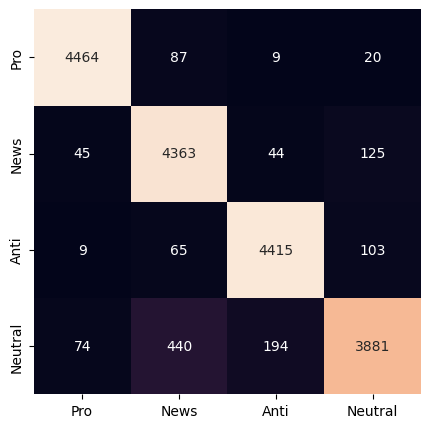

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

plt.figure(figsize = (5,5))
sns.heatmap(cm,annot=True,xticklabels=label2id.keys(),yticklabels=label2id.keys(),fmt = 'd',cbar = False)
plt.show()

[[4464   87    9   20]
 [  45 4363   44  125]
 [   9   65 4415  103]
 [  74  440  194 3881]]


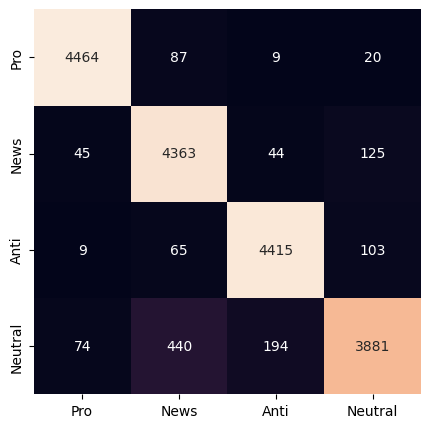

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

plt.figure(figsize = (5,5))
sns.heatmap(cm,annot=True,xticklabels=label2id.keys(),yticklabels=label2id.keys(),fmt = 'd',cbar = False)
plt.show()

In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are your true labels and predicted labels
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Per-class accuracy
per_class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
print("Per-class accuracy:", per_class_accuracy)

Per-class accuracy: [0.97467249 0.95324448 0.9614547  0.84571802]
